## UCI Adult Income Dataset - Exploratory and Descriptive Analysis
 This note book is focused on the exploratory and descriptive analysis of the cleaned Version

In [138]:
import pandas as pd 
import numpy as np 
import os 
import plotly.express as px

## Define and create Paths

In [140]:
current_dir= os.getcwd()
#go one directory up to the root directory
project_root_dir =os.path.dirname(current_dir)
#Define paths to the data file
data_dir = os.path.join(project_root_dir,"data")
raw_dir = os.path.join(data_dir,"raw")
processed_dir = os.path.join(data_dir,'processed')
#Define paths to the result fold
results_dir = os.path.join(project_root_dir,"result") 
#define path to docs folderabs
docs_dir = os.path.join(project_root_dir,"docs")

#create directory If they do not exist 
os.makedirs(raw_dir,exist_ok=True)
os.makedirs(processed_dir,exist_ok=True)
os.makedirs(results_dir,exist_ok=True)
os.makedirs(docs_dir,exist_ok=True)

## Read in the data

In [142]:
adult_data_filename = os.path.join(processed_dir, 'adults_cleaned.csv')
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,united-states,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,united-states,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,united-states,<=50k,highschoolgraduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,united-states,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,cuba,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,united-states,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,jamaica,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,united-states,>50k,highschoolgraduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,united-states,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,united-states,>50k,tertiary,white collar,north america,36-45


### Check the shape of the dataset and datatypes

In [144]:
adult_df.shape

(32514, 17)

In [145]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32514 entries, 0 to 32513
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32514 non-null  int64 
 1   workclass           32514 non-null  object
 2   fnlwgt              32514 non-null  int64 
 3   education_num       32514 non-null  int64 
 4   marital_status      32514 non-null  object
 5   relationship        32514 non-null  object
 6   race                32514 non-null  object
 7   sex                 32514 non-null  object
 8   capital_gain        32514 non-null  int64 
 9   capital_loss        32514 non-null  int64 
 10  hours_per_week      32514 non-null  int64 
 11  native_country      32514 non-null  object
 12  income              32514 non-null  object
 13  education_level     32514 non-null  object
 14  occupation_grouped  32514 non-null  object
 15  native_region       32514 non-null  object
 16  age_group           32

## Summary statistics

In [147]:
adult_df[adult_df.duplicated(keep=False)]

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_level,occupation_grouped,native_region,age_group


In [148]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32514.000000,3.251400e+04,32514.000000,32514.000000,32514.000000,32514.000000
mean,38.589684,1.897916e+05,10.081626,1079.206619,87.430030,40.440026
std,13.639112,1.055782e+05,2.571975,7390.514416,403.237687,12.351147
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370492e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [149]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,native_country,income,education_level,occupation_grouped,native_region,age_group
count,32514,32514,32514,32514,32514,32514,32514,32514,32514,32514,32514
unique,7,4,5,5,2,42,2,7,5,7,7
top,private,married,male spouse,white,male,united-states,<=50k,highschoolgraduate,white collar,north america,26-35
freq,22651,14984,13178,27772,21758,29131,24678,10484,16533,30019,8501


In [150]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696654
self-employed    0.112444
government       0.069416
local-gov        0.064372
unknown          0.056468
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [151]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854155
black                        0.096020
asian or pacific islander    0.031925
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Incame distribution

In [153]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24678
1,>50k,7836


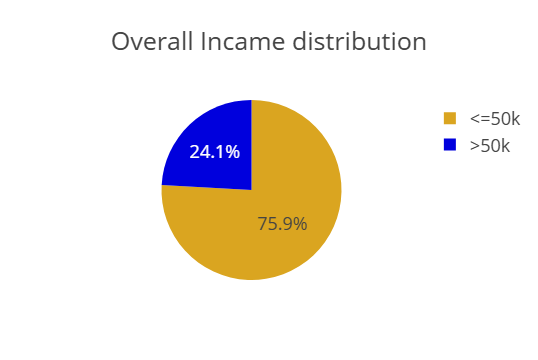

In [249]:
fig= px.pie(adult_df_income, names='income',values='total',title='Overall Incame distribution', color_discrete_sequence=["goldenrod","#00D"])
# fig.update_layout(template= "presentation", paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor=("rgba(0,0,0,0,0)"))
# fig.show()
fig.update_layout(template="presentation", paper_bgcolor="rgba(0,0,0,0)",plot_bgcolor=("rgba(0,0,0,0)"))
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_pie_chart.html'))

## Income by Age Group

In [156]:
adult_df_income_age = adult_df.groupby(['age_group','income']).size().reset_index(name='total_by_age').sort_values(['age_group','income'],ascending = True)
adult_df_income_age                                                                        

,age_group,income,total_by_age
0,18-25,<=50k,5334
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [157]:
total_per_group=adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage']=(adult_df_income_age['total_by_age']/total_per_group)*100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5334,97.907489
1,18-25,>50k,114,2.092511
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


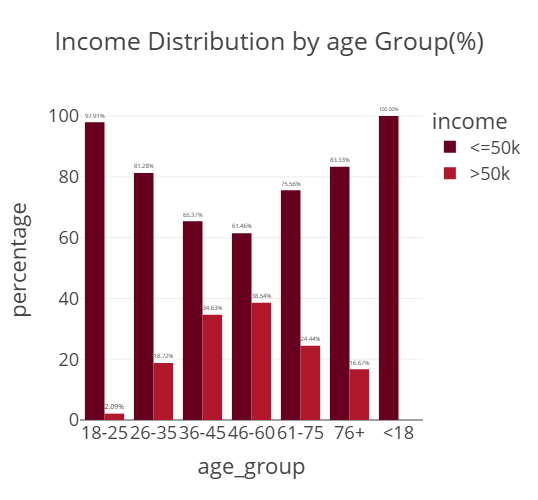

In [271]:
fig= px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color= 'income',
    title='Income Distribution by age Group(%)',
    barmode = 'group',
    height=500,
    text= 'percentage',
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')
fig.update_layout(template="presentation", paper_bgcolor="rgba(0,0,0,0)",plot_bgcolor=("rgba(0,0,0,0)"))
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_AGEgroup1_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_AGEgroup1_chart.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_AGEgroup1_chart.html'))

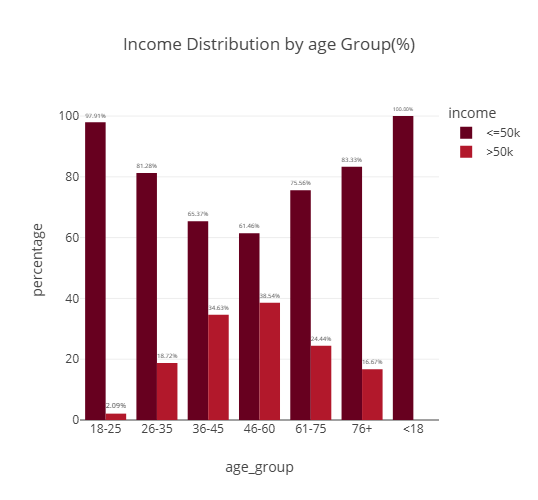

In [269]:
themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "presentation", "xgridoff", "ygridoff", "gridon", "none"]

for theme in themes:
    fig.update_layout(template=theme)
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_AGEgroup_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_AGEgroup_pie_chart.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_AGEgroup_pie_chart.html'))


In [160]:
# pip install -U kaleido

In [161]:
# pip install -U plotly

In [162]:
adult_df_income_native_region = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region                                                                  

,native_region,income,total_income_distr
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22769
7,north america,>50k,7250
8,other,<=50k,435
9,other,>50k,146


In [163]:
total_per_all=adult_df_income_native_region.groupby('native_region')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage']=(adult_df_income_native_region['total_income_distr']/total_per_all)*100
adult_df_income_native_region
# total_per_group=adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
# adult_df_income_age['percentage']=(adult_df_income_age['total_by_age']/total_per_group)*100
# adult_df_income_age

,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22769,75.848629
7,north america,>50k,7250,24.151371
8,other,<=50k,435,74.870912
9,other,>50k,146,25.129088


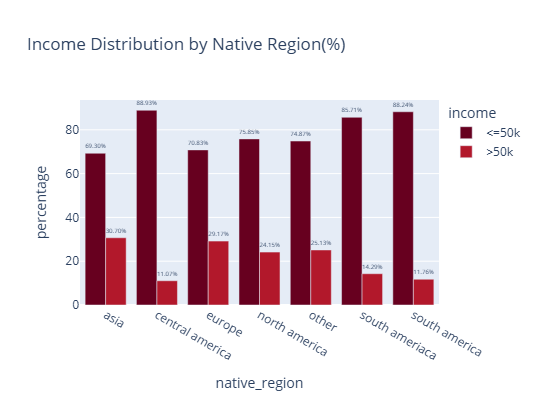

In [263]:
fig= px.bar(
    adult_df_income_native_region,
    x = 'native_region',
    y = 'percentage',
    color= 'income',
    title='Income Distribution by Native Region(%)',
    barmode = 'group',
    height=400,
    text= 'percentage',
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_Native_region_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_Native_region_pie_chart.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_Native_region_pie_chart.html'))


In [165]:
adult_df_income_race = adult_df.groupby(['race', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_race                                                                 

,race,income,total_income_distr
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20660
9,white,>50k,7112


In [166]:
total_per_allrace=adult_df_income_race.groupby('race')['total_income_distr'].transform('sum')
adult_df_income_race['percentage']=(adult_df_income_race['total_income_distr']/total_per_allrace)*100
adult_df_income_race

,race,income,total_income_distr,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20660,74.391473
9,white,>50k,7112,25.608527


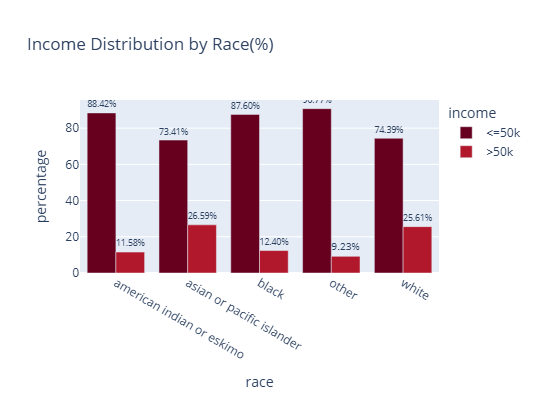

In [167]:
fig= px.bar(
    adult_df_income_race,
    x = 'race',
    y = 'percentage',
    color= 'income',
    title='Income Distribution by Race(%)',
    barmode = 'group',
    height=400,
    text= 'percentage',
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')
fig.update_layout()
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_Native_region_race_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_Native_region_race_pie_chart.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_Native_region_race_pie_chart.html'))


In [168]:
adult_df_income_educ_occ= adult_df.groupby(['education_level','occupation_grouped','income']).size().reset_index(name='total_income_distr')
adult_df_income_educ_occ

,education_level,occupation_grouped,income,total_income_distr
0,associate,blue collar,<=50k,482
1,associate,blue collar,>50k,166
2,associate,service,<=50k,237
3,associate,service,>50k,44
4,associate,unknown,<=50k,89
5,associate,unknown,>50k,19
6,associate,white collar,<=50k,1015
7,associate,white collar,>50k,397
8,highschoolgraduate,blue collar,<=50k,3976
9,highschoolgraduate,blue collar,>50k,796


In [197]:
# total_per_allrace=adult_df_income_race.groupby('race')['total_income_distr'].transform('sum')
# adult_df_income_race['percentage']=(adult_df_income_race['total_income_distr']/total_per_allrace)*100
# adult_df_income_race
adult_df_income_educ_occ['edu_occ']=(adult_df_income_educ_occ['education_level']+'|'
                                     +adult_df_income_educ_occ['occupation_grouped'])
adult_df_income_educ_occ                          

,education_level,occupation_grouped,income,total_income_distr,edu_occ
0,associate,blue collar,<=50k,482,associate|blue collar
1,associate,blue collar,>50k,166,associate|blue collar
2,associate,service,<=50k,237,associate|service
3,associate,service,>50k,44,associate|service
4,associate,unknown,<=50k,89,associate|unknown
5,associate,unknown,>50k,19,associate|unknown
6,associate,white collar,<=50k,1015,associate|white collar
7,associate,white collar,>50k,397,associate|white collar
8,highschoolgraduate,blue collar,<=50k,3976,highschoolgraduate|blue collar
9,highschoolgraduate,blue collar,>50k,796,highschoolgraduate|blue collar


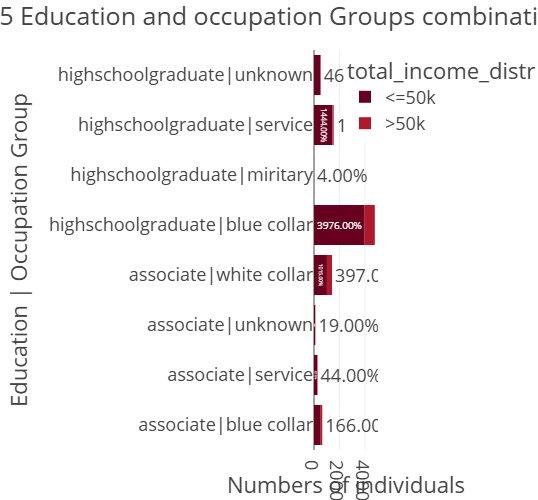

In [291]:
# num=15
# adult_df_combos = adult_df_income_edu_occ.head(num)
# fig = px.bar(
#     adult_df_combos,
#     x = 'total',
#     y = 'edu_occ',
#     color = 'income',
#     orientation = 'h',
#     title = f'Top{num} Education and Occupation Groups Combinations by Income Group',
#     # barmode = 'group',
#     height = 500,
#     width=1100,
#    color_discrete_sequence=["teal","LightSeaGreen"],
#     text = 'total'
# )

# fig.update_layout(template="presentation", xaxis_title='Number of Individuals',
#                   yaxis_title='Education | Occupation Group',
#                   legend_title=dict(text='Income Level'),
#                 margin=dict(l=450, r=50, t= 50, b=50))

num=15
adult_df_combos = adult_df_income_educ_occ.head(num)
fig= px.bar(
    adult_df_combos,
    x = 'total_income_distr',
    y = 'edu_occ',
    color= 'income',
    title=f'Top {num} Education and occupation Groups combination(%)',
    # barmode = 'group',
    height=500,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='total_income_distr'
)
fig.update_traces(texttemplate='%{text:.2f}%')
fig.update_traces(textposition='outside')
fig.update_layout(template="presentation",xaxis_title='Numbers of individuals',
                 yaxis_title='Education | Occupation Group',
                 legend_title= dict(text='total_income_distr'),
                 margin=dict(l=400,t=50, r=50, b=50))
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_education_occupation_chart.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_education_occupation_chart.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_education_occupation_chart.html'))

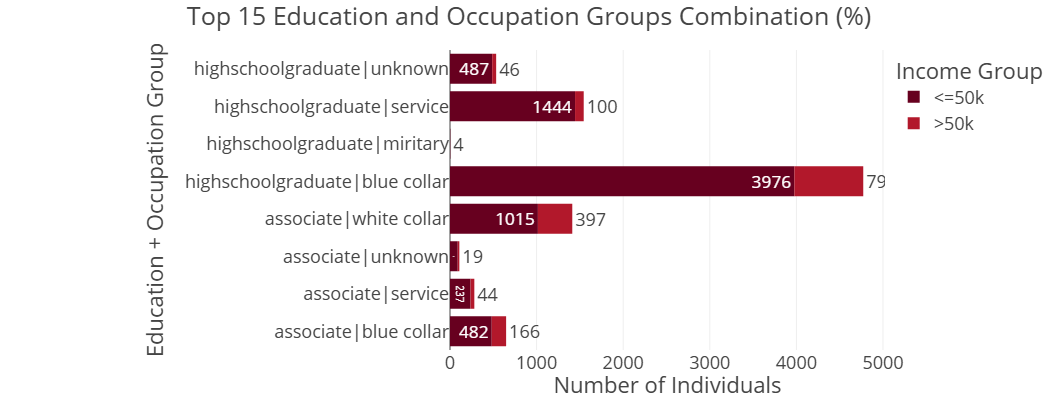

In [313]:
fig = px.bar(
    adult_df_income_educ_occ.head(15),
    x='total_income_distr',
    y='edu_occ',
    color='income',
    title='Top 15 Education and Occupation Groups Combination (%)',
    # barmode='stack',  # or 'group' — 'start' is not a valid option
    height=400,
    width=1000,
    text='total_income_distr',
    color_discrete_sequence=px.colors.sequential.RdBu
)

# Update trace and layout
fig.update_traces(textposition='outside')
fig.update_layout(
    template="presentation",
    xaxis_title='Number of Individuals',
    yaxis_title='Education + Occupation Group',
    legend_title='Income Group',
    margin=dict(l=450, r=50,t=50, b=50)
)

# Show plot
fig.show()